# Study of the Competencies of primary schools in Catalonia focusing on the nature of the centre

The aim of this section of the project is to analyze what roles public and private schools play at Catalonia.
In order to do so, I will
1. Understand how schools are distributed in Catalonia, depending on the nature of the centre,
2. Compare private and public schools in educational achivement, preferably differentiating between subjects
3. Correlate the school achievement in private schools with the expenditure in them, both in time, and spatially.

### Database- 6e de primaria

In [3]:
import pandas as pd
from sodapy import Socrata

# Replace None with your app token "AVDM_Competencies" for authenticated access
client = Socrata("analisi.transparenciacatalunya.cat", "LvvKUfbMJLH9IdgS7C4hXbeye")

# Fetch the first 2000 results as JSON and convert them to a Python list of dictionaries
results = client.get("rk5x-gny6",limit=1000000)

# Convert to pandas DataFrame
comp = pd.DataFrame.from_records(results)

# Display the DataFrame
# print(comp)

In [11]:
# Modify what it is wrong in the dataframe:
comp['genere'] = comp['genere'].replace({'Home': 'H', 'Dona': 'D'})

### 1. Distribution of private and public schools in Catalonia

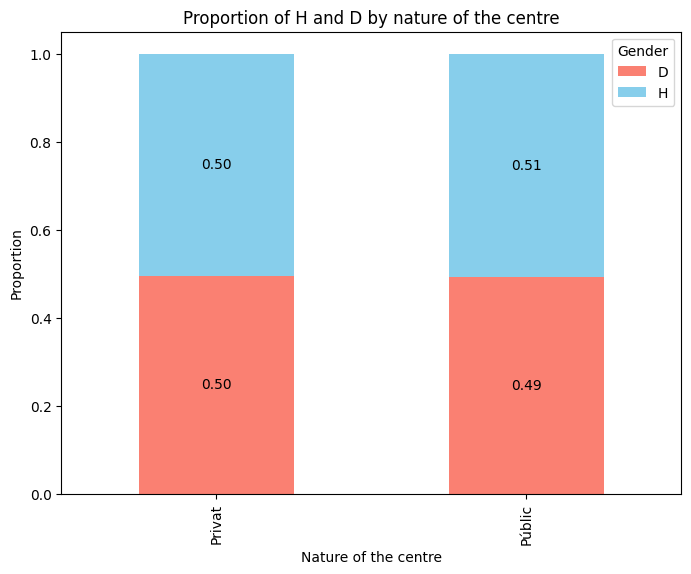

In [35]:
# Comparison of gender

import matplotlib.pyplot as plt

# Step 1: Calculate the counts of "H" and "D" for each category
counts = comp.groupby(['naturalesa', 'genere']).size().unstack(fill_value=0)

# Step 2: Calculate proportions by dividing by row sums
proportions = counts.div(counts.sum(axis=1), axis=0)

# Step 3: Plot a stacked bar chart
ax = proportions.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 6))

# Customize the plot
plt.title('Proportion of H and D by nature of the centre')
plt.xlabel('Nature of the centre')
plt.ylabel('Proportion')
plt.legend(title='Gender')

# Adding proportion labels on each bar
for i, (index, row) in enumerate(proportions.iterrows()):
    cumulative_height = 0  # Keeps track of where to place each label
    for j, proportion in enumerate(row):
        cumulative_height += proportion
        ax.text(i, cumulative_height - proportion / 2, f"{proportion:.2f}", ha='center', va='center', color='black')

plt.show()


In [ ]:
ccounts = comp.naturalesa.value_counts()
hvalue = ccounts['Privat']/(counts['Privat']+counts['Públic'])

0.35309797275898125

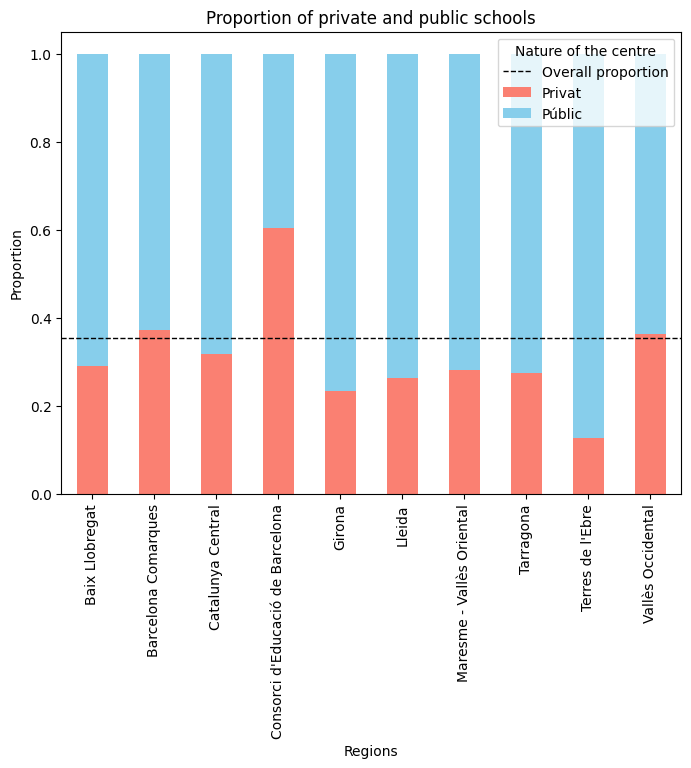

In [38]:
import matplotlib.pyplot as plt

# Step 1: Calculate the counts of "H" and "D" for each category
counts = comp.groupby(['area_territorial', 'naturalesa']).size().unstack(fill_value=0)

# Step 2: Calculate proportions by dividing by row sums
proportions = counts.div(counts.sum(axis=1), axis=0)

# Step 3: Plot a stacked bar chart
ax = proportions.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 6))

# Calculate the overall counts of each 'naturalesa' category (e.g., private and public) across all areas
ccounts = comp['naturalesa'].value_counts()

# Calculate the overall proportion for "Privat" as a single value
hvalue = ccounts['Privat'] / (ccounts['Privat'] + ccounts['Públic'])

# Draw a single horizontal line for the overall "Privat" proportion
ax.axhline(y=hvalue, color='black', linestyle='--', linewidth=1, label='Overall proportion')

# Customize the plot
plt.title('Proportion of private and public schools')
plt.xlabel('Regions')
plt.ylabel('Proportion')
plt.legend(title='Nature of the centre')
plt.show()


### 2. Educational achievement

In [21]:
c_priv = comp[comp["naturalesa"] == "Privat"]
c_pub = comp[comp["naturalesa"] == "Públic"]


In [22]:
c_priv.area_territorial

0              Tarragona
1              Tarragona
2              Tarragona
3              Tarragona
4              Tarragona
               ...      
962980    Baix Llobregat
962981    Baix Llobregat
962982    Baix Llobregat
962983    Baix Llobregat
962984    Baix Llobregat
Name: area_territorial, Length: 340045, dtype: object

In [8]:
print("Media Mat Global. Privado:", pd.to_numeric(c_priv.pmat, errors = "coerce").mean())
print("Media Mat Global. Público:", pd.to_numeric(c_pub.pmat, errors = "coerce").mean())


Media Mat Global. Privado: 80.17855130287832
Media Mat Global. Público: 76.26788004966657


### Database- expenditure

In [ ]:
import pandas as pd
from sodapy import Socrata

# Replace None with your app token "AVDM_Competencies" for authenticated access
client = Socrata("analisi.transparenciacatalunya.cat", "LvvKUfbMJLH9IdgS7C4hXbeye")

# Fetch the first 2000 results as JSON and convert them to a Python list of dictionaries
results = client.get("8spq-9nx7",limit=10000)

# Convert to pandas DataFrame
Gastos = pd.DataFrame.from_records(results)

# Display the DataFrame
#print(Gastos)

     curs_escolar codi_centre                      nom_centre  \
0       2022-2023    08053625                  Delta - Espiga   
1       2022-2023    08031356                        Montagut   
2       2022-2023    08031371                      Sant Josep   
3       2022-2023    08031401         Sant Ramon de Penyafort   
4       2022-2023    08031381  Vedruna Vilafranca del Penedès   
...           ...         ...                             ...   
4155    2017-2018    08000700             Maristes Champagnat   
4156    2017-2018    08000670         Mare de Déu de la Salut   
4157    2017-2018    08000608                      Montserrat   
4158    2017-2018    08000578              Nen Jesús de Praga   
4159    2017-2018    08000517                     Sant Andreu   

                    municipi                               titularitat  \
0     Vilafranca del Penedès                         Fundació L'Espiga   
1     Vilafranca del Penedès                  Fundació Escola Montagut 